This work is based on the recent observation that the long-term average number of days above 40 degrees celsius observed at Wagga Wagga each year is around 2.5, while during the year 2019, there were 19 days observed with a maximum temperature above 40 degrees. Use the statistical normal distribution to represent the natural variability of the number of days above 40 degrees, it is attempted to calculate the probability that a number as high as 19 is observed due to natural variability alone. The file of daily maximum temperature observations is sourced from http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=122&p_display_type=dailyDataFile&p_startYear=&p_c=&p_stn_num=072150. 

In [70]:
import numpy as np
import pandas as pd
import scipy.stats

In [77]:
# Set the directory path and file name of the data file
filepath = '/Users/nick/Documents/Research/WaggaWagga_Temp/'
filename = 'ww_temp_data.csv'

In [78]:
# read in the file of temperature data as a pandas dataframe
temp_pd = pd.read_csv(filepath + filename)

# view a snapshot of the structure of the temperature data
temp_pd.head(5) 

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,72150,1942,1,1,NaN,NaN,NaN
1,IDCJAC0010,72150,1942,1,2,NaN,NaN,NaN
2,IDCJAC0010,72150,1942,1,3,NaN,NaN,NaN
3,IDCJAC0010,72150,1942,1,4,NaN,NaN,NaN
4,IDCJAC0010,72150,1942,1,5,NaN,NaN,NaN


In [79]:
# Extract the columns 'year', 'month', 'day', and 'Maximum temperature (Degree C)' and store them in a numpy array
temp_np = np.array([temp_pd['Year'],temp_pd['Month'],temp_pd['Day'],temp_pd['Maximum temperature (Degree C)']]).transpose()

# View the organisation of the numpy array
print(temp_np[:5, :]) 

[[1.942e+03 1.000e+00 1.000e+00       nan]
 [1.942e+03 1.000e+00 2.000e+00       nan]
 [1.942e+03 1.000e+00 3.000e+00       nan]
 [1.942e+03 1.000e+00 4.000e+00       nan]
 [1.942e+03 1.000e+00 5.000e+00       nan]]


In [80]:
# Clean up the data by dealing with missing values.
# Separate the observations and missing data in different arrays. Only the data in the array 'temp_obs' will be
# used in the later analysis. 
ii = np.isnan(temp_np[:,3])
temp_obs = temp_np[ii == False, :]
temp_missing = temp_np[ii, :]

# This line can be un-commented to view the extent of the missing data. 
#print(temp_missing)

In [81]:
# This cell extracts the number of days with a maximum temperature over 40 degrees from the observational record. 
# First we set up a vector of the years in our observational period to loop through:
year_first = temp_np[0,0]
year_last = temp_np[-1,0]
years = np.arange(year_first, year_last + 1, 1)

# create an empty array to store the number of 40 degree days for each year
ly = np.shape(years)[0]
yearly_days_over_40 = np.zeros((ly, 2))
yearly_days_over_40[:,0] = years

# Find the number of days >= 40 degrees for each year in the observational record, and store it as a np array
for y in years:
    
    days_over_40 = temp_obs[(temp_obs[:,0] == y) & (temp_obs[:,3] >= 40.0), :]
    yearly_days_over_40[yearly_days_over_40[:,0] == y, 1] = np.shape(days_over_40)[0]
    
#print(yearly_days_over_40)

Before we test the probability that a given year (such as 2019) is observed, we can view a simple histogram of the number of 40-degree days each year to see a visual representation of the data in the climatological record:

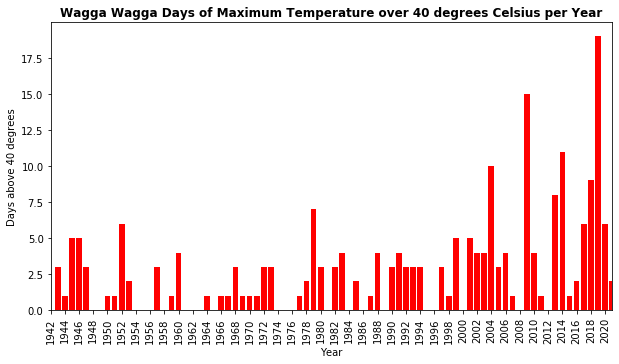

In [82]:
import matplotlib.pyplot as plt

# Create a plot(figure) object, and then an axes object on that plot object
fig = plt.figure()
ax = fig.add_axes([0,0,1.3,1])

year_labels = np.arange(years[0], years[-1], 2, dtype = int)

# Set the axes attributes here
ax.set_title('Wagga Wagga Days of Maximum Temperature over 40 degrees Celsius per Year', weight = 'bold')
ax.set_xlabel('Year')
ax.set_ylabel('Days above 40 degrees')

ax.set_xlim(years[0], years[-1])
ax.set_xticks(year_labels)
ax.set_xticklabels(year_labels, rotation = 'vertical')

ax.bar(yearly_days_over_40[:,0], yearly_days_over_40[:,1], color = 'red')
plt.show()

In this section we begin the analysis of recent temperature extremes. We begin by first establishing the baseline climatology of days above 40 degrees in the historical record, computing the mean and stndard deviations of these quantities. 

The number of days of a temperature greater than 40 degrees will be treated as a proportion of the whole year. It is not possible to have less than 0 days with a maximum temperature greater than 40 degrees, and simnilarly it is also impossible to have greater than 365 such days. Thus we are testing the proportion of days out of the whole year duration that fit a binary characteristic (i.e. is the maximum temperature greater than 40 degrees or not?).

In [85]:
# Determine the baseline climatology period, and the mean and variability of the climatology. 
clim_year_first = 1942
clim_year_last = 2010 # this choice is arbitrary and subjective. 

clim_days_over_40 = yearly_days_over_40[(yearly_days_over_40[:,0] >= clim_year_first) & (yearly_days_over_40[:,0] <= clim_year_last), :]

mean_days_over_40 = np.mean(clim_days_over_40[:,1])
std_days_over_40 = np.std(clim_days_over_40[:,1])

print('Climatology mean days over 40 degrees:', mean_days_over_40)
print('Climatology standard deviation of days over 40 degrees:', std_days_over_40)

n = 365 # days in a year

# express the numbers of days over 40 degrees as a proportion of the whole year
pc = mean_days_over_40 / n # mean proportion of 40+ degree days per year in climatology
pst = std_days_over_40 / n # standard deviation of proportion of 40+ degree days per year in climatology

print('Climatology mean proportion of days over 40 degrees:', pc)
print('Climatology standard deviation of proportion of days over 40 degrees:', pst)

Climatology mean days over 40 degrees: 2.2028985507246377
Climatology standard deviation of days over 40 degrees: 2.56836783532541
Climatology mean proportion of days over 40 degrees: 0.006035338495135993
Climatology standard deviation of proportion of days over 40 degrees: 0.007036624206370986


In [89]:
# Extract the proportion of days above 40 degrees in the year being tested:
testyear = 2019
testyear_days_over_40 = int(yearly_days_over_40[yearly_days_over_40[:,0] == testyear, 1])

print('Test year days over 40 degrees:', testyear_days_over_40)

n = 365 # days in a year

# express the numbers of days over 40 degrees as a proportion of the whole year
pt = testyear_days_over_40 / n

print('Test year proportion of days over 40 degrees:', pt)


Test year days over 40 degrees: 19
Test year proportion of days over 40 degrees: 0.052054794520547946


In [90]:
# Compute the probability of the a proportion of days above 40 degrees equal to (or greater than) the year being
# tested, based on the natural climate variability represented with a normal distribution (the validity of the
# normal distribution to this problem will be discussed in a later section):

prob_test = 1 - scipy.stats.norm(pc, pst).cdf(pt) # 1 - cdf for the upper tail probability
print('Probability of observed proportion in test year: ', prob_test)


Probability of observed proportion in test year:  3.076139343249906e-11


Using a baseline climatology period of 1942-2010, we find that the probability of a proportion of dats above 40 degrees as extreme as 2019 is in the order of 10^(-11). Limiting the climatology to earlier years (e.g. 2000) results in an even smaller probability that is too small to show. 

While the year 2019 stands out as a year with a number of 40 degree days which is several times higher than the long-term average, the resulting probability associated with the extreme value observed is probably distorted by the use of the normal distribution for the analysis. It is known that the normal distribution is a poor representation of a proportion when the product of the proportion and the number of units in the sample size is either very low or very high. Various guides on statisics reccomend a 'rule-of-thumb' that the values of n * p and n * (1 - p) should both be greater than at least 5 (with some works reccomending 10 or 15 - the higher the value, the better the fit to a normal distribution). In this case, the value of n * p is simply 365 * 2.2 / 365 = 2.2, which is less than half of the lowest reccomended guideline of 5. A different statistical distribution to represent the variability of the baseline climate would give a better estimate of the probability of observing the temperature extremes in 2019.  

Another point of discussion is the length of time taken for any increase in extreme temperatures to appear clearly in the historical record. Viewing the histogram of observed days of maximum temperatures above 40 degrees, little trend in the number of 40 degree days prior to the 2000's is evident at a first glance.


To conclude, it can be seen that the year 2019 stands out as a year of extreme temperature in the context of the historical record. The probability of observing a such an expression of extreme temperature due to natural variability alone is small, but is likely to be exaggerated by the use of the normal distribution to model the natural variability. This work is not intended to present a rigorous attribution of observed temperature extremes to anthropogenic climate change, but rather to present a simple demonstration of the principles of statistics and their application to climate analysis. 